# Day 08. Exercise 04
# Regression

## 0. Imports

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import root_mean_squared_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [99]:
df = pd.read_csv('../data/checker_regression.csv').drop(columns=['uid'])
df

,num_commits,pageviews,AVG(diff)
0,62,28.0,NaN
1,62,28.0,NaN
2,62,28.0,NaN
3,62,28.0,NaN
4,62,28.0,NaN
...,...,...,...
72,128,NaN,-104.75
73,40,NaN,-175.60
74,15,NaN,-62.60
75,8,NaN,-115.50


In [100]:
df.fillna(0,inplace=True)
df

,num_commits,pageviews,AVG(diff)
0,62,28.0,0.00
1,62,28.0,0.00
2,62,28.0,0.00
3,62,28.0,0.00
4,62,28.0,0.00
...,...,...,...
72,128,0.0,-104.75
73,40,0.0,-175.60
74,15,0.0,-62.60
75,8,0.0,-115.50


In [101]:
y = df['AVG(diff)']
X=df.drop(columns=['AVG(diff)'])
X

,num_commits,pageviews
0,62,28.0
1,62,28.0
2,62,28.0
3,62,28.0
4,62,28.0
...,...,...
72,128,0.0
73,40,0.0
74,15,0.0
75,8,0.0


In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=21,test_size=0.2)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [103]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    train_results = []
    test_results = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        
        train_results.append(train_rmse)
        test_results.append(test_rmse)
        
        print(f"train - {train_rmse:.4f}   |   test - {test_rmse:.4f}")

    average_rmse = np.mean(test_results)
    print(f"Average RMSE on crossval is {average_rmse:.4f}")
		

        


In [104]:
lr_model = LinearRegression()
crossval(10, X, y, lr_model)


train - 42.2729   |   test - 70.4398
train - 47.4573   |   test - 30.6574
train - 47.7785   |   test - 27.1373
train - 46.2442   |   test - 44.1231
train - 46.3936   |   test - 42.4204
train - 47.7154   |   test - 28.2734
train - 46.3089   |   test - 45.6731
train - 47.8119   |   test - 20.5725
train - 44.1292   |   test - 63.1496
train - 42.3509   |   test - 74.1589
Average RMSE on crossval is 44.6605


In [105]:
model_decision = DecisionTreeRegressor(max_depth=8,random_state=21)
crossval(10, X, y, model_decision)

train - 0.0000   |   test - 71.8849
train - 0.0000   |   test - 25.2437
train - 0.0000   |   test - 0.0000
train - 0.0000   |   test - 20.2940
train - 0.0000   |   test - 72.2051
train - 0.0000   |   test - 28.9914
train - 0.0000   |   test - 7.0364
train - 0.0000   |   test - 8.1262
train - 0.0000   |   test - 86.6365
train - 0.0000   |   test - 65.9305
Average RMSE on crossval is 38.6349


In [109]:
random_model = RandomForestRegressor(n_estimators=60,max_depth=5)
crossval(10, X, y, random_model)

train - 14.9506   |   test - 57.1042
train - 17.1950   |   test - 9.5039
train - 17.2377   |   test - 0.0000
train - 16.7240   |   test - 25.5386
train - 15.3243   |   test - 51.8672
train - 16.3573   |   test - 33.1654
train - 17.0932   |   test - 16.2575
train - 17.2236   |   test - 32.1300
train - 12.2692   |   test - 72.6553
train - 15.4494   |   test - 43.7167
Average RMSE on crossval is 34.1939


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [112]:
lr_model.fit(X_train,y_train)
y_pr = lr_model.predict(X_test)
y_pr

array([-27.15893204, -38.51261441, -33.59771207, -36.13990293,
       -23.94195387,  -6.99709369, -25.80407191, -41.05495923,
       -25.80407191, -27.83541276, -25.80407191,  -6.99709369,
        -7.84418275, -19.70122303, -29.70019922, -29.70019922])

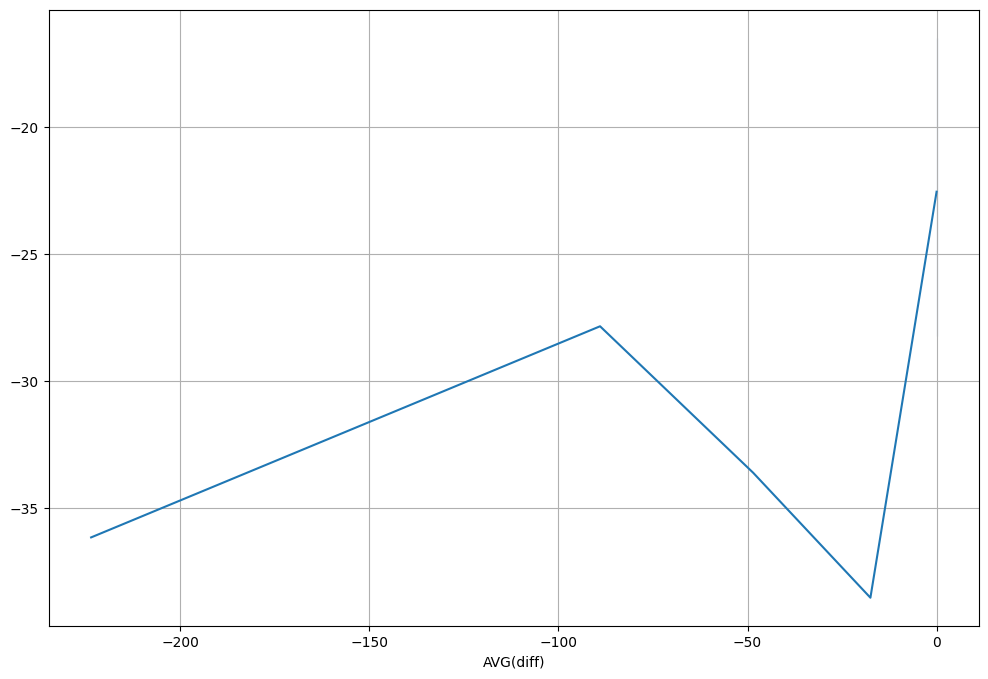

In [120]:
plt.figure(figsize=(12,8))
sns.lineplot(x=y_test,y=y_pr)
plt.grid(True)
plt.show()


In [121]:
random_model.fit(X_train,y_train)
y_pr = random_model.predict(X_test)
y_pr

array([   0.        ,  -42.23102337, -115.61665895,  -85.86588448,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        , -109.23992857,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ])

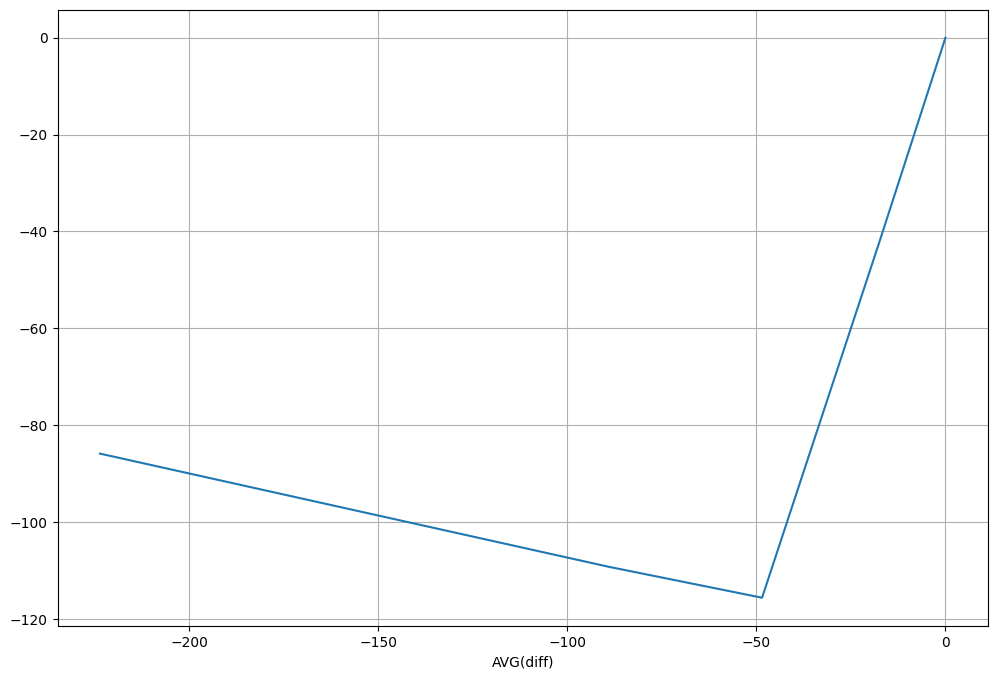

In [122]:
plt.figure(figsize=(12,8))
sns.lineplot(x=y_test,y=y_pr)
plt.grid(True)
plt.show()

In [124]:
model_decision.fit(X_train,y_train)
y_pr = model_decision.predict(X_test)
y_pr

array([   0.        ,   -5.33333333, -157.4       ,  -52.33333333,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        , -160.4       ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ])

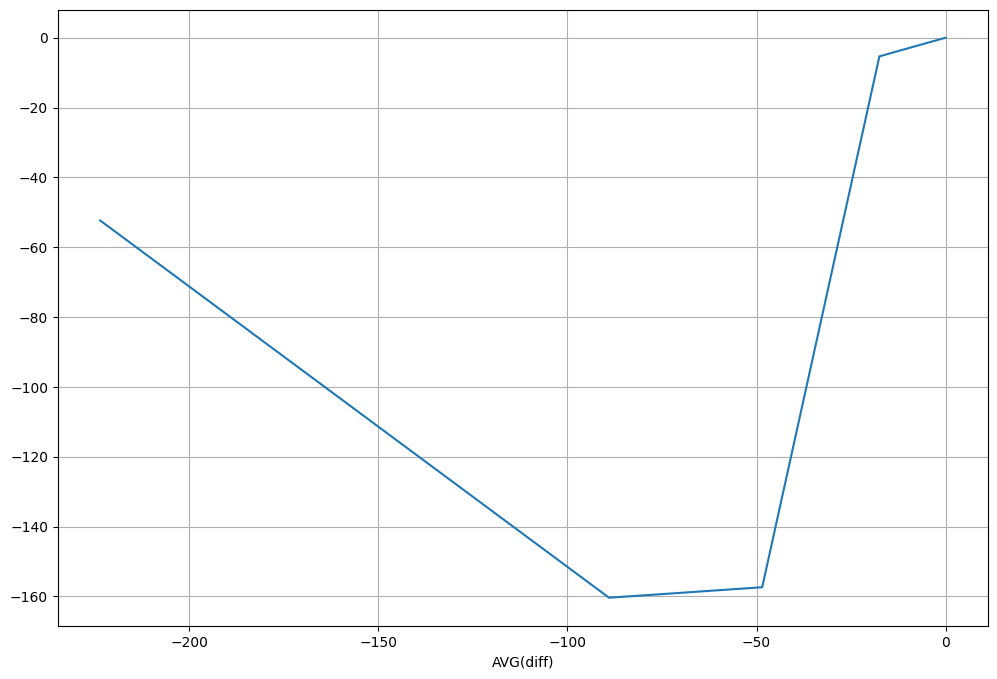

In [125]:
plt.figure(figsize=(12,8))
sns.lineplot(x=y_test,y=y_pr)
plt.grid(True)
plt.show()